# Super Bowl Data Analysis

Super Bowl is a American football game played every year to decide the winner of that National Football League season. This event is very special for most of the American football lovers. Those who are not fan of football even watch Super Bowl for its TV ads and halftime shows. 

In this notebook, elements of Superbowl show is analyzed. After exploring and cleaning the data, questions below are answered:</p>
<ul>
<li>What are the most extreme game outcomes?</li>
<li>How does the game affect television viewership?</li>
<li>How have viewership, TV ratings, and ad cost evolved over time?</li>
<li>Who are the most prolific musicians in terms of halftime show performances?</li>
</ul>

In [2]:
import pandas as pd

super_bowls = pd.read_csv('super_bowls.csv')
tv = pd.read_csv('tv.csv')
halftime_musicians = pd.read_csv('halftime_musicians.csv')

# Display the first five rows of each DataFrame
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


Because there are missing values in the above output, NaN values are inspected in the overall data using .info()

In [17]:
super_bowls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6),

In [18]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


In [19]:
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


The distribution of combined points for each Super Bowl is visualized.

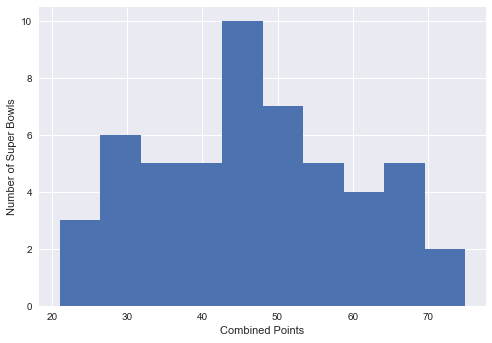

In [7]:
# Import matplotlib and set plotting style
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Plot a histogram of combined points
plt.hist(super_bowls['combined_pts'])
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

### What are the most extreme game outcomes?
Super Bowls that have a score higher than 70 and lower than 25 are displayed to see the highest and lowest scoring games. 

In [8]:
# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


The distribution of point difference for each Super Bowl is visualized.

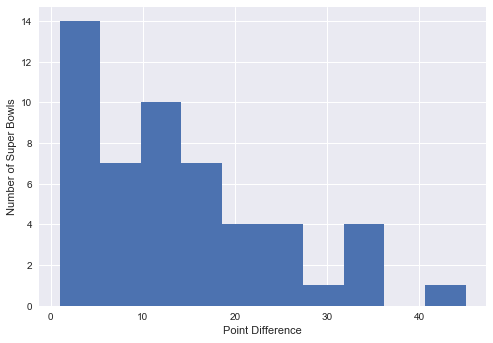

In [9]:
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

Games that have 1 point difference and more than 35 difference are displayed.

In [21]:
# Display the closest game(s) and biggest blowouts
display(super_bowls[super_bowls.difference_pts<5])
display(super_bowls[super_bowls.difference_pts>=35])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
5,2013-02-03,47,Mercedes-Benz Superdome,New Orleans,Louisiana,71024,Baltimore Ravens,34,Joe Flacco,NaN,John Harbaugh,San Francisco 49ers,31,Colin Kaepernick,NaN,Jim Harbaugh,65,3
6,2012-02-05,46,Lucas Oil Stadium,Indianapolis,Indiana,68658,New York Giants,21,Eli Manning,NaN,Tom Coughlin,New England Patriots,17,Tom Brady,NaN,Bill Belichick,38,4
9,2009-02-01,43,Raymond James Stadium,Tampa,Florida,70774,Pittsburgh Steelers,27,Ben Roethlisberger,NaN,Mike Tomlin,Arizona Cardinals,23,Kurt Warner,NaN,Ken Whisenhunt,50,4
10,2008-02-03,42,University of Phoenix Stadium,Glendale,Arizona,71101,New York Giants,17,Eli Manning,NaN,Tom Coughlin,New England Patriots,14,Tom Brady,NaN,Bill Belichick,31,3
13,2005-02-06,39,Alltel Stadium,Jacksonville,Florida,78125,New England Patriots,24,Tom Brady,NaN,Bill Belichick,Philadelphia Eagles,21,Donovan McNabb,NaN,Andy Reid,45,3
14,2004-02-01,38,Reliant Stadium,Houston,Texas,71525,New England Patriots,32,Tom Brady,NaN,Bill Belichick,Carolina Panthers,29,Jake Delhomme,NaN,John Fox,61,3
16,2002-02-03,36,Louisiana Superdome,New Orleans,Louisiana,72922,New England Patriots,20,Tom Brady,NaN,Bill Belichick,St. Louis Rams,17,Kurt Warner,NaN,Mike Martz,37,3
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1
29,1989-01-22,23,Joe Robbie Stadium,Miami Gardens,Florida,75129,San Francisco 49ers,20,Joe Montana,NaN,Bill Walsh,Cincinnati Bengals,16,Boomer Esiason,NaN,Sam Wyche,36,4


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


## Do large point differences translate to lost viewers?
Most Super Bowls are close games. Point differences are small. However, for some of the games, point differences are so big as you can see above, which may cause the viewers to get bored. There is a significant question to ask here: Do large point differences translate to lost viewers? Household share (average percentage of U.S. households with a TV in use that were watching for the entire broadcast) vs. point difference is plotted to answer this question.

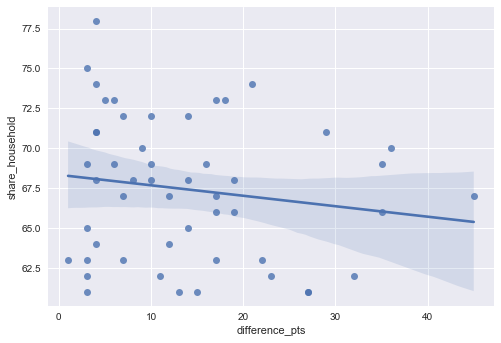

In [22]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

import seaborn as sns

# Create a scatter plot with a linear regression model fit
sns.regplot(x='difference_pts', y='share_household', data=games_tv)

The downward sloping regression line and the 95% confidence interval for that regression suggest that bailing on the game if it is a blowout is common. However, the linear relationship in the data is weak due to our small sample size of 52 games.

## Viewership and the ad industry over time
A 30-second spot costs a pretty $5 million now, but has it always been that way? And how have number of viewers and household ratings trended alongside ad cost?

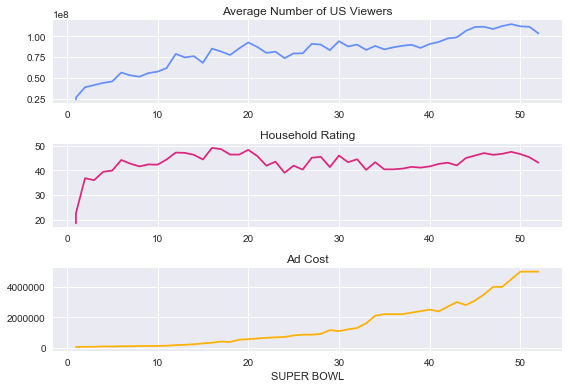

In [12]:
# Create a figure with 3x1 subplot and activate the top subplot
from matplotlib import pyplot as plt
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers , color='#648FFF')
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color= '#DC267F')
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost , color='#FFB000' )
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

Viewers increased before ad costs did.

### Halftime shows 
Halftime shows are a big part of Super Bowl. A lot of people watch Super Bowl to get to see these shows. One of the most watched events in American TV history was the Michael Jackson's Super Bowl performance. That was when NFL realized the value of Super Bowl airtime and decided they needed to sign big name acts from then on out.The halftime shows before Michael Jackson are displayed below. 

In [23]:
# Display all halftime musicians for Super Bowls up to Michael Jackson
halftime_musicians[halftime_musicians.super_bowl<=27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


Musicians with more than one halftime show appearance are displayed below.

In [14]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
halftime_appearances[halftime_appearances['super_bowl']>1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


### Who performed the most songs in a halftime show?
After bands are leaved out, musicians are filtered to see who performed the highest number of songs. 

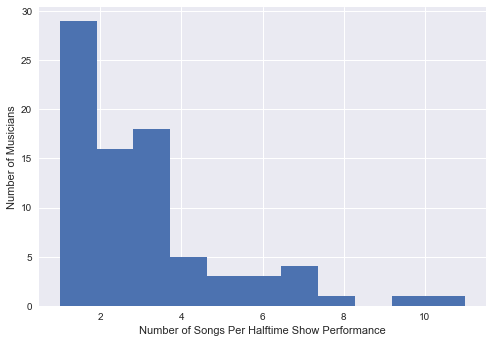

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [24]:
# Because bands have 'Marching' and 'Spirit' in their name, they are filtered out using these words
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

# Sort the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# display the top 15
display(no_bands.head(15))